In [6]:
import cv2
from PIL import Image
image = cv2.imread("./SKU110K_fixed/images/test/test_80.jpg")

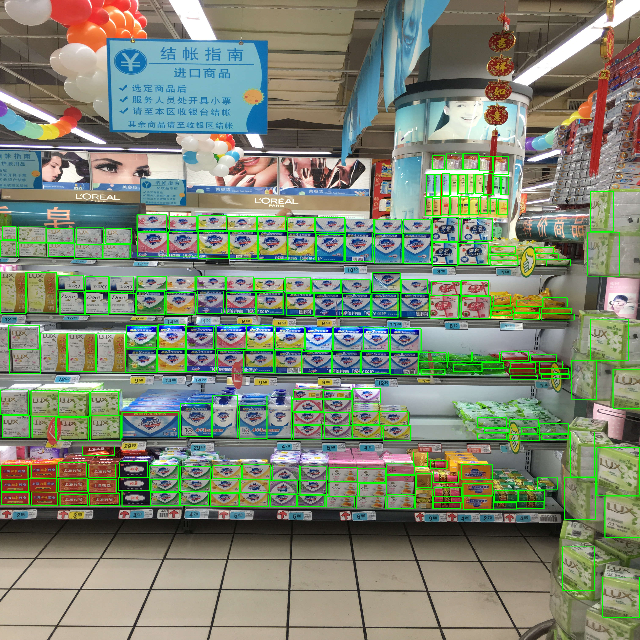

In [12]:
#Cada imagem possui um arquivo de rótulo no formato YOLO [classe_id, center_x, center_y, w, h]
with open("./SKU110K_fixed/labels/test/test_80.txt") as f: 
    lines = f.read().strip().split("\n")                    
    for line in lines:
        values = line.split()
        class_id = int(values[0])
        center_x = float(values[1])
        center_y = float(values[2])
        width = float(values[3])
        height = float(values[4])

        #Converte coordenadas de YOLO para coordenadas em pixeis
        image_height, image_width = image.shape[:2]
        
        #Desenha retângulos dos objetos detectados na imagem.
        x1 = int((center_x - width / 2) * image_width)
        y1 = int((center_y - height / 2) * image_height)
        x2 = int((center_x + width / 2) * image_width)
        y2 = int((center_y + height / 2) * image_height)
        cv2.rectangle(image, (x1,y1), (x2,y2), (0,255,0), 4)

Image.fromarray(cv2.resize(image[:,:,::-1], (640, 640)))

In [8]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)

True
11.8


In [4]:
import torch
print(torch.__version__)

2.5.1+cu118


In [7]:
print(torch.version.cuda) 

11.8


In [5]:
!nvidia-smi

Mon Dec  9 11:07:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P3             14W /   55W |       0MiB /   6141MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----